In [1]:
#Import Modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns
# from pprint import pprint
# import yfinance as yf
# import yahoo_fin.stock_info as si
# from yahoo_fin.stock_info import get_data


In [2]:
# Read in csv files from api and web scrape calls
pharma_df = pd.read_csv('Resources/pharma.csv')
pharma_df.head()


Symbol           Security GICS Sub-Industry  Market Cap ($Billion)  \
0    JNJ  Johnson & Johnson   Pharmaceuticals                431.052   
1    PFE        Pfizer Inc.   Pharmaceuticals                199.492   
2    LLY  Lilly (Eli) & Co.   Pharmaceuticals                198.673   
3    MRK        Merck & Co.   Pharmaceuticals                196.533   
4   ABBV        AbbVie Inc.   Pharmaceuticals                181.019   

    Price ($)  Dividend ($)  Yield (%)  EPS (TTM)  PE Ratio (TTM)  \
0  163.718399          4.04       2.48       5.51           29.72   
1   35.897999          1.56       4.35       1.54           23.34   
2  207.699997          3.40       1.63       6.79           30.60   
3   77.699997          2.60       3.37       4.53           17.16   
4  102.639999          5.20       5.07       4.57           22.45   

   PEG Ratio (5-Year)  Price-Book Ratio  
0                3.17              6.96  
1                4.87              3.06  
2                1.36             37.81  
3                1.16              6.68  
4                 NaN             11.85

In [3]:
# Read in csv files from api and web scrape calls
daily_df = pd.read_csv('Resources/daily_pharma_data.csv',index_col=0)
daily_df.head()

PRGO_close  PRGO_volume  PRGO_return  CTLT_close  CTLT_volume  \
2015-01-02  166.630005       710700          NaN   27.510000       187300   
2015-01-05  164.910004       725500    -0.010430   28.080000       455200   
2015-01-06  164.600006       878500    -0.001883   26.549999       622100   
2015-01-07  167.350006       851300     0.016433   27.809999       457200   
2015-01-08  171.169998      1117200     0.022317   27.990000       183800   

            CTLT_return  VTRS_close  VTRS_volume  VTRS_return  ALXN_close  \
2015-01-02          NaN   56.349998      1398000          NaN  186.600006   
2015-01-05     0.020299   55.720001      2996200    -0.011306  182.169998   
2015-01-06    -0.057627   54.180000      6610900    -0.028424  177.949997   
2015-01-07     0.045307   56.110001      3663000     0.034397  187.929993   
2015-01-08     0.006431   56.650002      3164000     0.009532  183.800003   

            ...  MRK_return  LLY_close  LLY_volume  LLY_return  PFE_close  \
2015-01-02  ...         NaN  70.059998     3146200         NaN  29.724857   
2015-01-05  ...    0.014645  69.370003     4845500   -0.009947  29.563566   
2015-01-06  ...    0.037798  69.720001     5127400    0.005020  29.810247   
2015-01-07  ...    0.020938  69.230003     9043000   -0.007078  30.218216   
2015-01-08  ...    0.019729  70.870003     7472200    0.023141  30.834915   

            PFE_volume  PFE_return   JNJ_close  JNJ_volume  JNJ_return  
2015-01-02    16371571         NaN  104.519997     5753600         NaN  
2015-01-05    24786391   -0.005456  103.790001     8079300   -0.007033  
2015-01-06    29468681    0.008275  103.279999     7428000   -0.004938  
2015-01-07    20248816    0.013501  105.559998     7931700    0.021599  
2015-01-08    49169522    0.020000  106.389999     9916000    0.007802  

[5 rows x 30 columns]

In [4]:
# Read in csv files from api and web scrape calls
returns_df = pd.read_csv('Resources/daily_returns.csv',index_col=0)
returns_df.head()

JNJ       PFE       LLY      PRGO      CTLT      VTRS  \
2015-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2015-01-05 -0.007033 -0.005456 -0.009947 -0.010430  0.020299 -0.011306   
2015-01-06 -0.004938  0.008275  0.005020 -0.001883 -0.057627 -0.028424   
2015-01-07  0.021599  0.013501 -0.007078  0.016433  0.045307  0.034397   
2015-01-08  0.007802  0.020000  0.023141  0.022317  0.006431  0.009532   

                ALXN       ZTS      ABBV       MRK       SPY  
2015-01-02       NaN       NaN       NaN       NaN       NaN  
2015-01-05 -0.024318 -0.006040 -0.019180  0.014645 -0.018392  
2015-01-06 -0.023715 -0.009852 -0.004974  0.037798 -0.009509  
2015-01-07  0.053105  0.020225  0.038847  0.020938  0.012308  
2015-01-08 -0.022470  0.015165  0.010350  0.019729  0.017436

In [5]:
# Read in csv files from api and web scrape calls
close_df = pd.read_csv('Resources/close_price_data.csv',index_col=0)
close_df.head()

JNJ_close  PFE_close  LLY_close  PRGO_close  CTLT_close  \
2015-01-02  104.519997  29.724857  70.059998  166.630005   27.510000   
2015-01-05  103.790001  29.563566  69.370003  164.910004   28.080000   
2015-01-06  103.279999  29.810247  69.720001  164.600006   26.549999   
2015-01-07  105.559998  30.218216  69.230003  167.350006   27.809999   
2015-01-08  106.389999  30.834915  70.870003  171.169998   27.990000   

            VTRS_close  ALXN_close  ZTS_close  ABBV_close  MRK_close  
2015-01-02   56.349998  186.600006  43.310001   65.889999  57.189999  
2015-01-05   55.720001  182.169998  43.049999   64.650002  58.040001  
2015-01-06   54.180000  177.949997  42.630001   64.330002  60.320000  
2015-01-07   56.110001  187.929993  43.509998   66.930000  61.610001  
2015-01-08   56.650002  183.800003  44.180000   67.629997  62.849998

In [6]:
# Build color map to highligh top three pharma equities by market cap
colors = {'JNJ':'orange','PFE':'orange','LLY':'orange', 'MRK':'blue','ABBV':'blue','ZTS':'blue','ALXN':'blue','VTRS':'blue','CTLT':'blue','PRGO':'blue' }

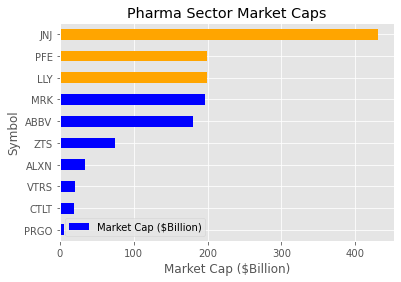

In [7]:
# Bar plot by market cap
plt.style.use('ggplot')
pharma_df.sort_values("Market Cap ($Billion)",ascending=True).plot.barh('Symbol','Market Cap ($Billion)',
                                                                        color=pharma_df.sort_values("Market Cap ($Billion)",ascending=True)['Symbol'].replace(colors))
plt.xlabel('Market Cap ($Billion)')
plt.title("Pharma Sector Market Caps")
plt.savefig('output_data/mkt_cap.png')

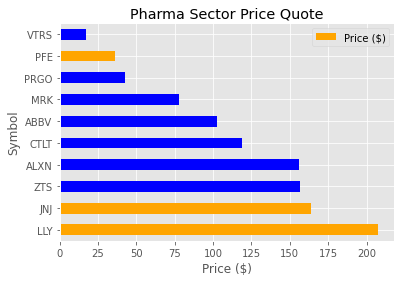

In [8]:
# Bar plot by Price
plt.style.use('ggplot')
pharma_df.sort_values("Price ($)",ascending=False).plot.barh('Symbol','Price ($)',
                                                             color=pharma_df.sort_values('Price ($)',ascending=False)['Symbol'].replace(colors))
plt.xlabel('Price ($)')
plt.title("Pharma Sector Price Quote")
plt.savefig('output_data/price_cap.png')

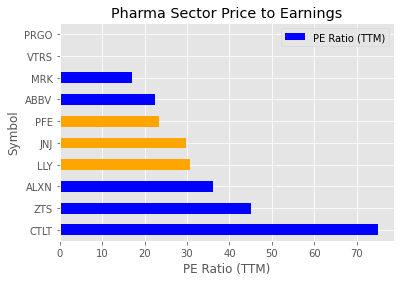

In [9]:
# Bar plot by PE Ratio
plt.style.use('ggplot')
pharma_df.sort_values("PE Ratio (TTM)",ascending=False).plot.barh('Symbol','PE Ratio (TTM)',
                                                                  color=pharma_df.sort_values('PE Ratio (TTM)',ascending=False)['Symbol'].replace(colors))
plt.xlabel('PE Ratio (TTM)')
plt.title("Pharma Sector Price to Earnings")
plt.savefig('output_data/PE_cap.png')

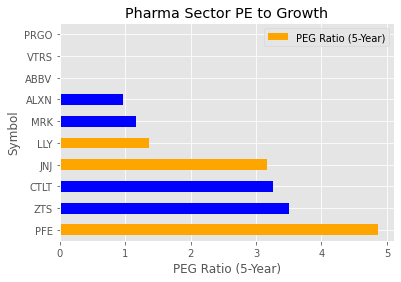

In [10]:
# Bar plot by PEG Ratio
plt.style.use('ggplot')
pharma_df.sort_values("PEG Ratio (5-Year)",ascending=False).plot.barh('Symbol','PEG Ratio (5-Year)',
                                                                      color=pharma_df.sort_values('PEG Ratio (5-Year)',ascending=False)['Symbol'].replace(colors))
plt.xlabel('PEG Ratio (5-Year)')
plt.title("Pharma Sector PE to Growth")
plt.savefig('output_data/peg_cap.png')

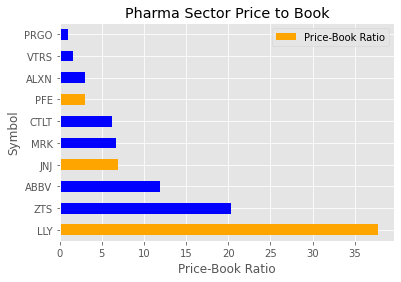

In [11]:
# Bar plot by PB Ratio
plt.style.use('ggplot')
pharma_df.sort_values("Price-Book Ratio",ascending=False).plot.barh('Symbol','Price-Book Ratio',
                                                                    color=pharma_df.sort_values('Price-Book Ratio',ascending=False)['Symbol'].replace(colors))
plt.xlabel('Price-Book Ratio')
plt.title("Pharma Sector Price to Book")
plt.savefig('output_data/pb_cap.png')

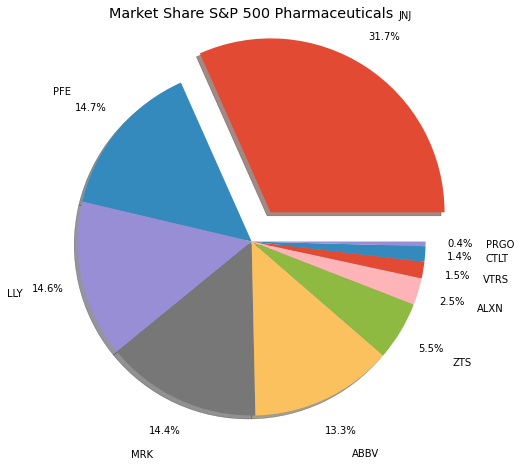

In [12]:
#Create pie chart for market share by market cap
plt.figure(figsize=(8,8))
plt.style.use('ggplot')
labels = pharma_df['Symbol']
explode = (0.2,0,0,0,0,0,0,0,0,0)
plt.pie(pharma_df['Market Cap ($Billion)'], labels=labels, explode=explode, shadow=True,autopct='%1.1f%%',
        pctdistance=1.2, labeldistance=1.35)

plt.title("Market Share S&P 500 Pharmaceuticals")
plt.savefig('output_data/mkt_share.png')
plt.show()

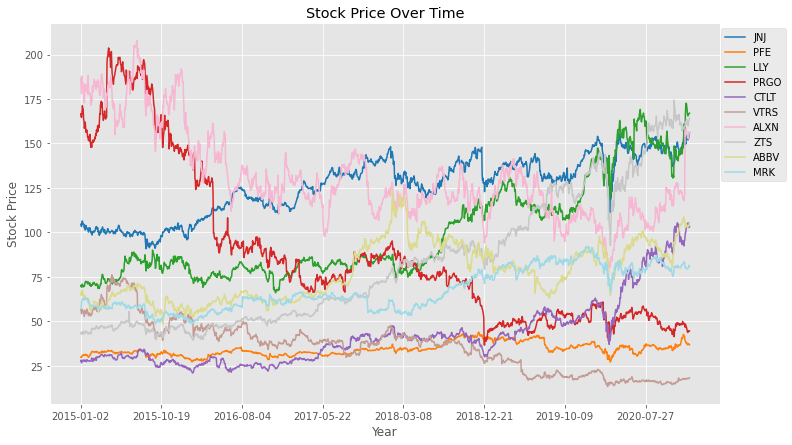

In [16]:
#Create line plot of close prices
plt.style.use('ggplot')
close_plot = close_df.plot.line(figsize =(12,7),cmap='tab20')
plt.ylabel('Stock Price')
plt.xlabel('Year')
plt.title('Stock Price Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper center',labels=['JNJ','PFE','LLY','PRGO','CTLT',
                                                               'VTRS','ALXN','ZTS','ABBV','MRK'])
plt.savefig('output_data/price_trend.png')
plt.show()

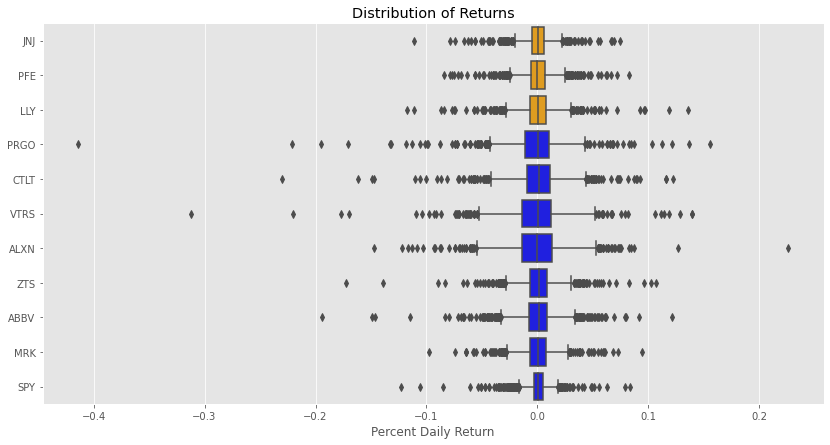

In [14]:
plt.figure(figsize =(14, 7))
plt.style.use('ggplot')

my_pal = {ticker: "orange" if (ticker == 'JNJ') | (ticker == 'PFE') | (ticker == 'LLY')
                    else "blue" for ticker in returns_df.columns.tolist()}

ax = sns.boxplot(data=returns_df, orient="h", palette=my_pal)

# Removing top axes and right axes 
# ticks 
ax.get_xaxis().tick_bottom() 
ax.get_yaxis().tick_left() 

# Set X label
plt.xlabel('Percent Daily Return')

# Adding title  
plt.title("Distribution of Returns")
plt.savefig('output_data/return_dist.png')